In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)
pd.set_option('display.precision', 2)

In [4]:
df = pd.read_csv('C:/Users/Инна/Desktop/otus/Sample - Superstore.csv', encoding='Windows-1252')

In [5]:
df.to_csv('./inna.csv')

Задача: 
сделать прогноз прибыли
предсказать прибыль меняя пар-ры - кол-во проданной продукции, долю определенного сегмента
(Предсказать размер прибыли для определенных транзакций, товаров, регионов и т.д.
проверить гипотезу о том какой регион прибыльнее, определить наиболее прибыльную категорию товаров, предсказать прибыль в разрезе регион/категория)
Таргет: Столбец Profit.
Признаки: 
Тип задачи: Регрессия.

In [6]:
df.shape

(9994, 21)

In [7]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.87


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
for col in df.columns:
    if not 'no' in col and not 'ID' in col:
        un_n = df[col].nunique()
        print(f'no of unique {col}: {un_n}')

no of unique Order Date: 1237
no of unique Ship Date: 1334
no of unique Ship Mode: 4
no of unique Customer Name: 793
no of unique Segment: 3
no of unique Country: 1
no of unique City: 531
no of unique State: 49
no of unique Postal Code: 631
no of unique Region: 4
no of unique Category: 3
no of unique Sub-Category: 17
no of unique Product Name: 1850
no of unique Sales: 5825
no of unique Quantity: 14
no of unique Discount: 12
no of unique Profit: 7287


In [10]:
print(df.isnull().sum().sum())

0


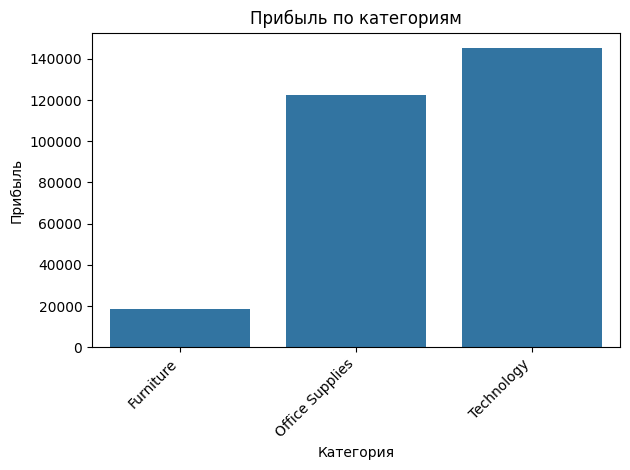

In [12]:
# Группировка по категориям и вычисление общей прибыли
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category)

plt.title('Прибыль по категориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

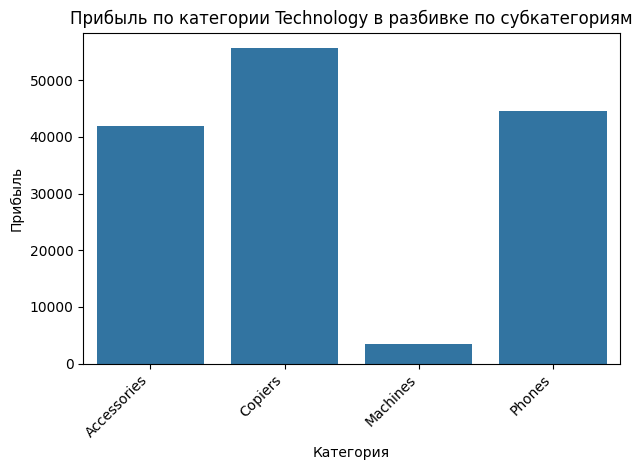

In [13]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Category'] == 'Technology'] # Фильтруем строки, относящиеся к категории "Technology"
profit_by_subcategory_technology = technology_df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по категории Technology в разбивке по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

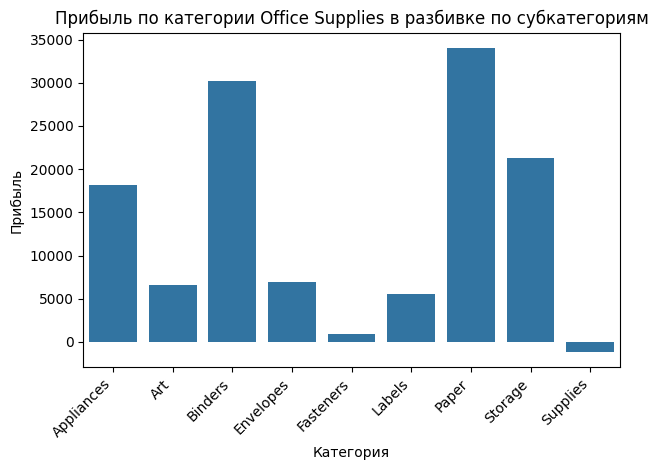

In [14]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Category'] == 'Office Supplies'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = technology_df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по категории Office Supplies в разбивке по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

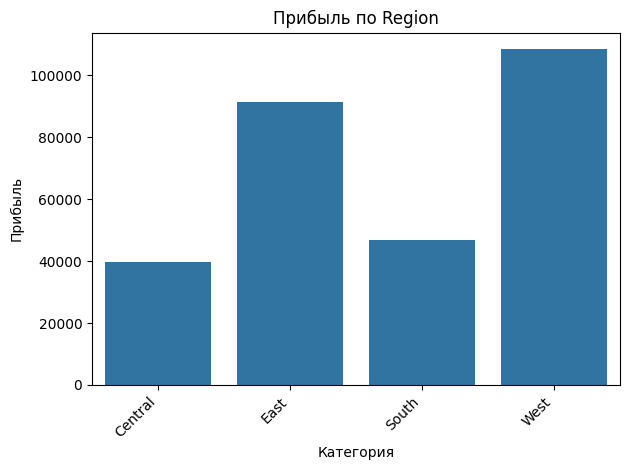

In [15]:
# Группировка по категориям и вычисление общей прибыли
# technology_df = df['Region'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Region')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по Region')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

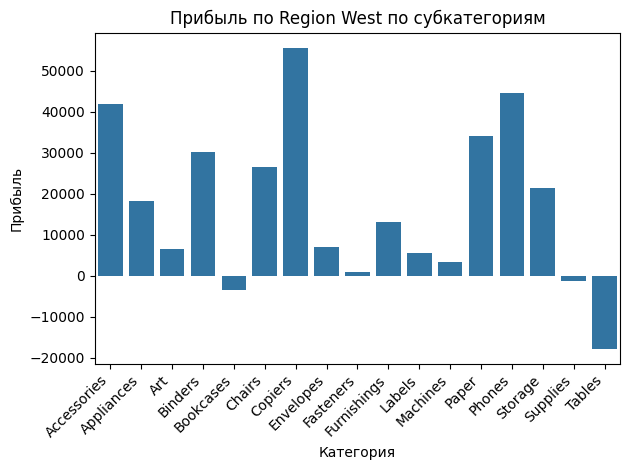

In [16]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Region'] == 'West'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по Region West по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()
#наблюдаем убыток по столам и прибыль по копирам

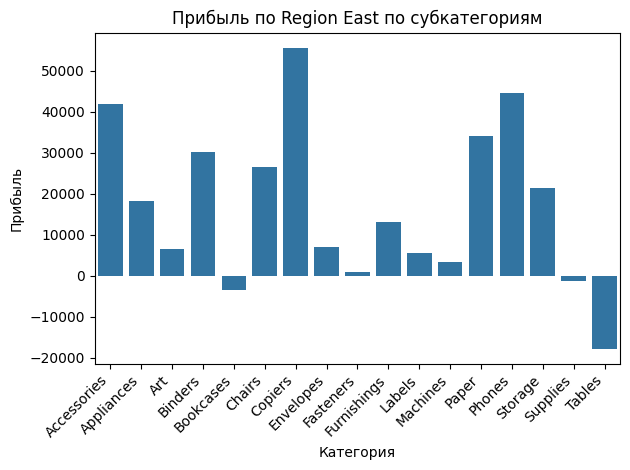

In [17]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Region'] == 'East'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title(f'Прибыль по Region East по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()
#наблюдаем убыток по столам и прибыль по копирам, телефонам, аксессуарам

In [18]:
# Преобразование столбца 'Order Date' в формат datetime
import pandas as pd
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
except ValueError:
    print("Ошибка: не удалось преобразовать 'Order Date' в формат даты.  Проверьте формат данных в столбце.")
    exit()

df['Order Date'].head(3)

0   2016-11-08
1   2016-11-08
2   2016-06-12
Name: Order Date, dtype: datetime64[ns]

In [19]:
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Year'].head(3)

0    2016
1    2016
2    2016
Name: Year, dtype: int32

In [20]:
profit_by_month = df.groupby('Month')['Profit'].sum().reset_index()
profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()
profit_by_year.head(3)

,Year,Profit
0,2014,49543.97
1,2015,61618.60
2,2016,81795.17


In [21]:
# Сортировка месяцев (важно для корректного отображения графика)
#  Если используется month_name(), нужно сортировать по порядку месяцев:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_by_month['Month'] = pd.Categorical(profit_by_month['Month'], categories=month_order, ordered=True)
profit_by_month = profit_by_month.sort_values('Month')
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
profit_by_month.head(3)

,Month,Profit
4,January,9134.45
3,February,10294.61
7,March,28594.69


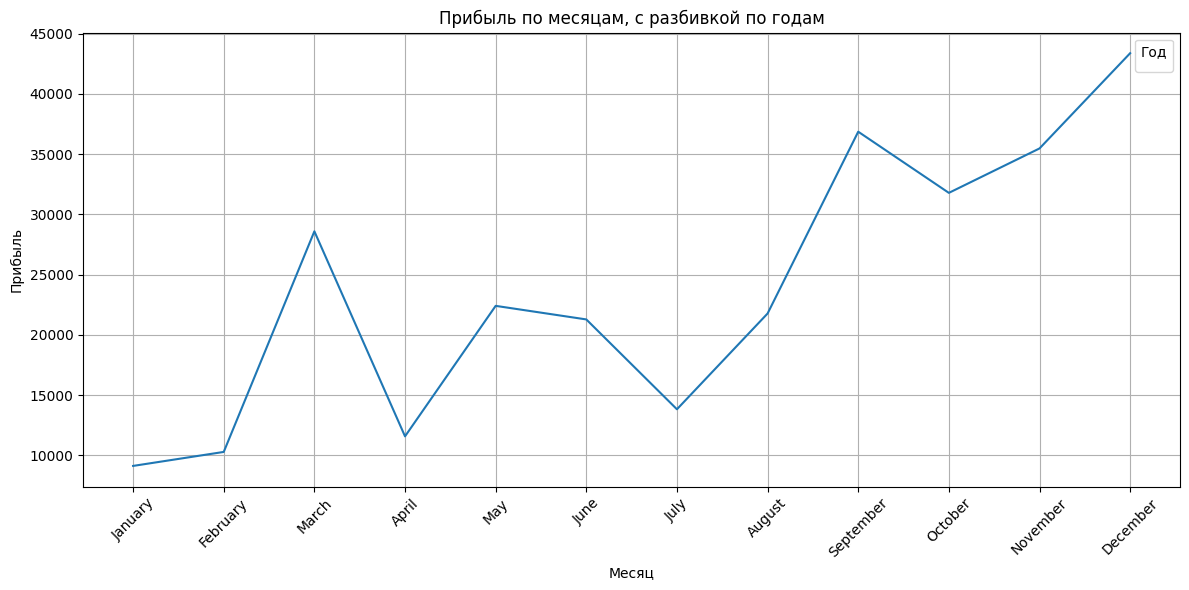

In [25]:
# Построение графика
plt.figure(figsize=(12, 6)) # Увеличение размера графика для лучшей читаемости
sns.lineplot(x='Month', y='Profit', data=df,errorbar=None, estimator='sum') # График с линией и маркерами

plt.title('Прибыль по месяцам, с разбивкой по годам')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Год')  # Добавляем заголовок к легенде
plt.show()

In [26]:
print(df['Profit'].describe())

count    9994.00
mean       28.66
std       234.26
min     -6599.98
25%         1.73
50%         8.67
75%        29.36
max      8399.98
Name: Profit, dtype: float64


In [27]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.00,9994,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,2016-04-30 00:07:12.259355648,55190.38,229.86,3.79,0.16,28.66,2015.72
min,1.00,2014-01-03 00:00:00,1040.00,0.44,1.00,0.00,-6599.98,2014.00
25%,2499.25,2015-05-23 00:00:00,23223.00,17.28,2.00,0.00,1.73,2015.00
50%,4997.50,2016-06-26 00:00:00,56430.50,54.49,3.00,0.20,8.67,2016.00
75%,7495.75,2017-05-14 00:00:00,90008.00,209.94,5.00,0.20,29.36,2017.00
max,9994.00,2017-12-30 00:00:00,99301.00,22638.48,14.00,0.80,8399.98,2017.00
std,2885.16,NaN,32063.69,623.25,2.23,0.21,234.26,1.12


In [28]:
df.groupby('Category')['Profit'].mean()

Category
Furniture           8.70
Office Supplies    20.33
Technology         78.75
Name: Profit, dtype: float64

In [30]:
df_filtered[df_filtered['Profit'] <= 20] #сделать гистогр по каким товарам низк приб

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
2,Second Class,Corporate,West,Office Supplies,Labels,14.62,2,0.00,6.87,June,2016
3,Standard Class,Consumer,South,Furniture,Tables,957.58,5,0.45,-383.03,October,2015
4,Standard Class,Consumer,South,Office Supplies,Storage,22.37,2,0.20,2.52,October,2015
5,Standard Class,Consumer,West,Furniture,Furnishings,48.86,7,0.00,14.17,June,2014
6,Standard Class,Consumer,West,Office Supplies,Art,7.28,4,0.00,1.97,June,2014
...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,West,Technology,Accessories,36.24,1,0.00,15.22,September,2016
9989,Second Class,Consumer,South,Furniture,Furnishings,25.25,3,0.20,4.10,January,2014
9990,Standard Class,Consumer,West,Furniture,Furnishings,91.96,2,0.00,15.63,February,2017
9991,Standard Class,Consumer,West,Technology,Phones,258.58,2,0.20,19.39,February,2017


In [31]:
df_filtered[df_filtered['Profit'] >= 3000] #сделать гистогр по каким товарам низк приб

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
509,Standard Class,Consumer,South,Office Supplies,Binders,6354.95,5,0.0,3177.47,March,2015
2623,First Class,Home Office,East,Technology,Copiers,11199.97,4,0.2,3919.99,October,2017
4098,Standard Class,Consumer,Central,Office Supplies,Binders,9449.95,5,0.0,4630.48,September,2014
4190,Standard Class,Consumer,East,Technology,Copiers,10499.97,3,0.0,5039.99,November,2017
6826,Standard Class,Corporate,Central,Technology,Copiers,17499.95,5,0.0,8399.98,October,2016
8153,First Class,Consumer,West,Technology,Copiers,13999.96,4,0.0,6719.98,March,2017
9039,Standard Class,Consumer,Central,Office Supplies,Binders,9892.74,13,0.0,4946.37,December,2016


In [32]:
df[df['Product Name'].isin(['Canon imageCLASS 2200 Advanced Copier'])].head(3)#самый дорог товар????

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
2623,2624,CA-2017-127180,2017-10-22,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,3919.99,October,2017
4190,4191,CA-2017-166709,2017-11-17,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.99,November,2017
6425,6426,CA-2016-143714,2016-05-23,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.98,4,0.4,1120.00,May,2016


In [34]:
df_filtered.sort_values(['Profit'], ascending=(False)).head(5) #cортировка по убыванию приб.

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
6826,Standard Class,Corporate,Central,Technology,Copiers,17499.95,5,0.0,8399.98,October,2016
8153,First Class,Consumer,West,Technology,Copiers,13999.96,4,0.0,6719.98,March,2017
4190,Standard Class,Consumer,East,Technology,Copiers,10499.97,3,0.0,5039.99,November,2017
9039,Standard Class,Consumer,Central,Office Supplies,Binders,9892.74,13,0.0,4946.37,December,2016
4098,Standard Class,Consumer,Central,Office Supplies,Binders,9449.95,5,0.0,4630.48,September,2014


In [35]:
df_filtered[df_filtered['Discount'] != 0].head(3)#самые большие скидки

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
3,Standard Class,Consumer,South,Furniture,Tables,957.58,5,0.45,-383.03,October,2015
4,Standard Class,Consumer,South,Office Supplies,Storage,22.37,2,0.20,2.52,October,2015
7,Standard Class,Consumer,West,Technology,Phones,907.15,6,0.20,90.72,June,2014


In [38]:
corr = df_filtered.select_dtypes(include=['number']).corr(method='pearson')
corr

,Sales,Quantity,Discount,Profit,Year
Sales,1.00e+00,2.01e-01,-2.82e-02,4.79e-01,-9.68e-03
Quantity,2.01e-01,1.00e+00,8.62e-03,6.63e-02,-5.81e-03
Discount,-2.82e-02,8.62e-03,1.00e+00,-2.19e-01,-2.66e-03
Profit,4.79e-01,6.63e-02,-2.19e-01,1.00e+00,4.67e-03
Year,-9.68e-03,-5.81e-03,-2.66e-03,4.67e-03,1.00e+00


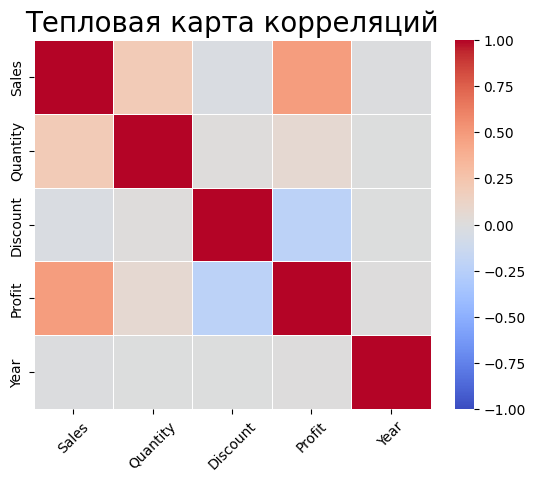

In [39]:
# Рисуем тепловую карту для корреляций

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляций', fontsize=20)
plt.xticks(rotation=45)
plt.show()

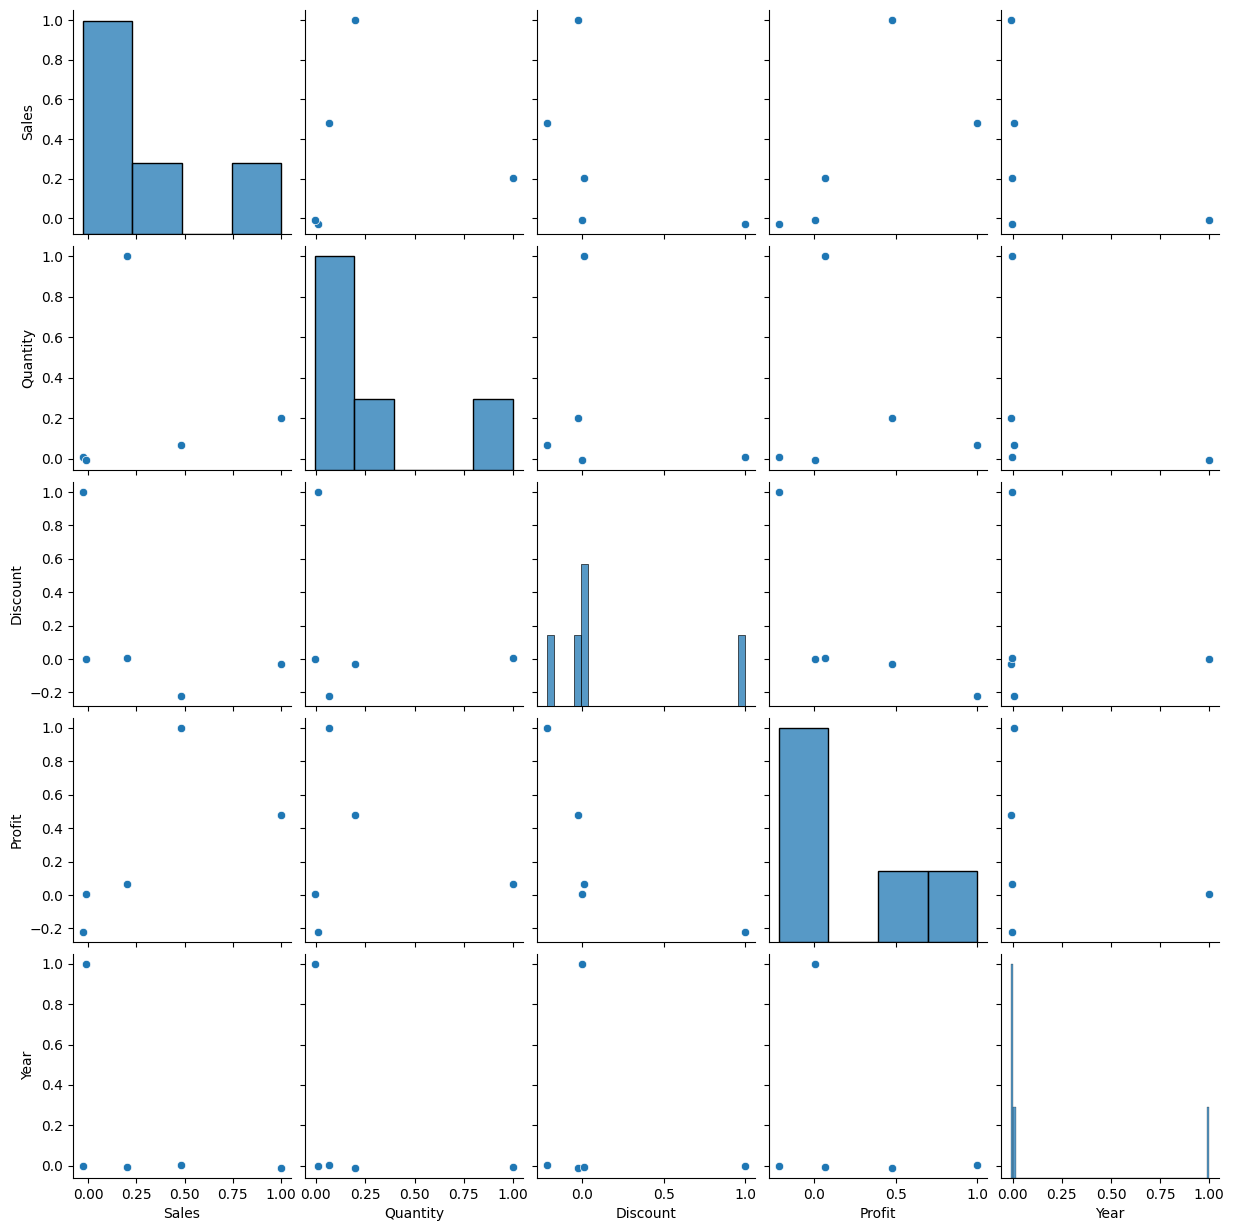

In [40]:
#построить после того как преобразую категориальные признаки
sns.pairplot(corr)
plt.show()